## EDA of Cleaned Data

In [8]:
# notebooks/01_exploration.ipynb

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🧼 Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
%matplotlib inline

# 📥 Load the cleaned data
df = pd.read_csv('../cleaned/cleanedcardata.csv')

# 📊 Basic Overview
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
df.head()


Shape: (2059, 24)

Data Types:
 Make                   object
Model                  object
Price                   int64
Year                    int64
Kms_Driven              int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine_Capacity       float64
Power                  object
Torque                 object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
max_bhp               float64
max_bhp_rpm           float64
max_torque            float64
max_torque_rpm        float64
dtype: object


,Make,Model,Price,Year,Kms_Driven,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine_Capacity,Power,Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,max_bhp,max_bhp_rpm,max_torque,max_torque_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,4000.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400.0


## Misiing Values

In [ ]:
# Check missing values
df = pd.read_csv('../cleaned/cleanedcardata.csv')
df.isnull().sum().sort_values(ascending=False)


max_bhp_rpm           212
max_bhp               212
max_torque_rpm        208
max_torque            208
Drivetrain            136
Fuel Tank Capacity    113
Engine_Capacity        80
Power                  80
Torque                 80
Seating Capacity       64
Width                  64
Length                 64
Height                 64
Price                   0
Model                   0
Make                    0
Location                0
Transmission            0
Fuel Type               0
Kms_Driven              0
Year                    0
Owner                   0
Seller Type             0
Color                   0
dtype: int64

## Cleaning the Data Again

In [10]:
# Fill categorical missing values with mode
df['Drivetrain'].fillna(df['Drivetrain'].mode()[0], inplace=True)
df['Seating Capacity'].fillna(df['Seating Capacity'].mode()[0], inplace=True)

# Fill numerical features with median
df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].median(), inplace=True)
df['Engine_Capacity'].fillna(df['Engine_Capacity'].median(), inplace=True)

# Drop rows where bhp/torque couldn't be extracted
df.dropna(subset=['max_bhp', 'max_torque'], inplace=True)

# Drop rows with missing dimensions (optional but safe)
df.dropna(subset=['Length', 'Width', 'Height'], inplace=True)

# Save the fully cleaned dataset
df.to_csv(r"D:\New_projects_ML\CarPricePrediction-ML-Project\cleaned\cleanedcardata_imputed.csv", index=False)


print("✅ Cleaned and imputed dataset saved.")


✅ Cleaned and imputed dataset saved.


C:\Users\Asus\AppData\Local\Temp\ipykernel_17692\3353681899.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Drivetrain'].fillna(df['Drivetrain'].mode()[0], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_17692\3353681899.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [9]:
df = pd.read_csv('../cleaned/cleanedcardata_imputed.csv')
df.isnull().sum().sort_values(ascending=False)
df.head()

,Make,Model,Price,Year,Kms_Driven,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine_Capacity,Power,Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,max_bhp,max_bhp_rpm,max_torque,max_torque_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,4000.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400.0


In [12]:
df.shape

(1847, 24)

## Distribution of Target Variable (Price)

Text(0.5, 0, 'Price (INR)')

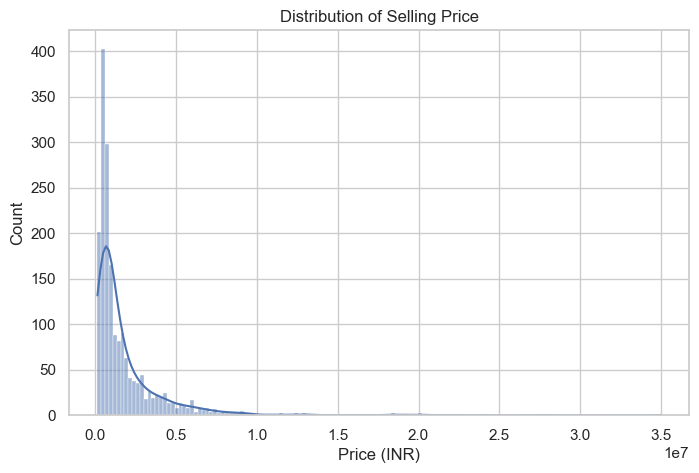

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Price (INR)")


## Mileage/Year/Kms vs Price

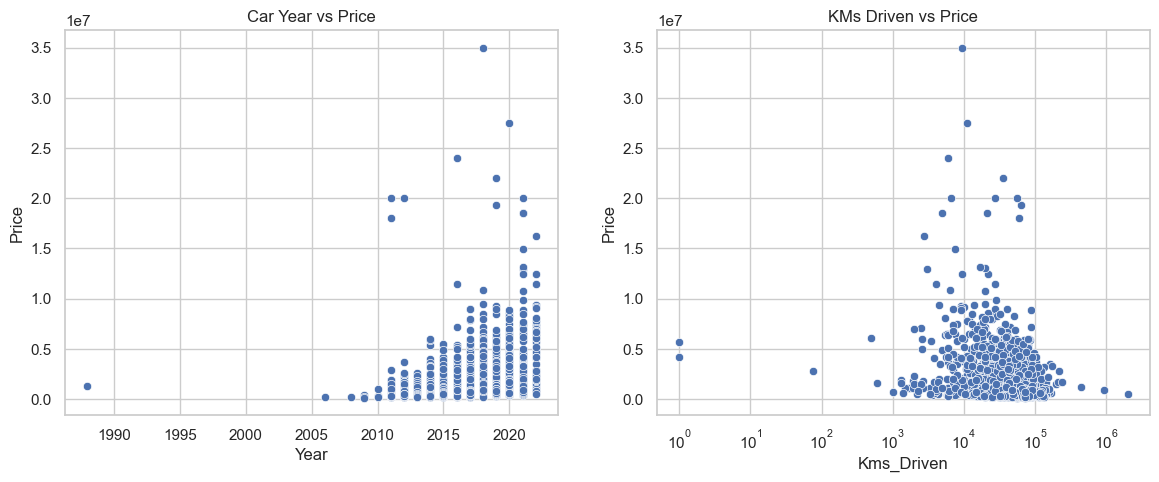

In [11]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Car Year vs Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Kms_Driven', y='Price', data=df)
plt.title('KMs Driven vs Price')
plt.xscale('log')


## Engine,bhp,torque vs Price

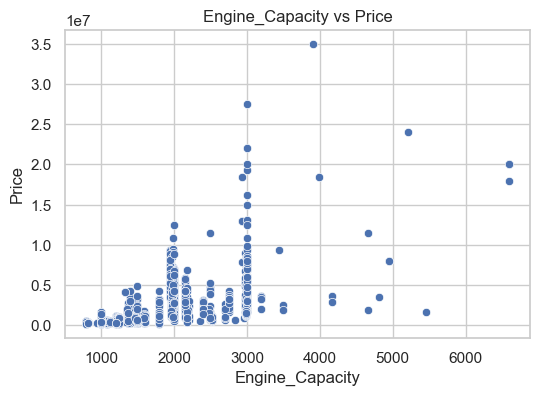

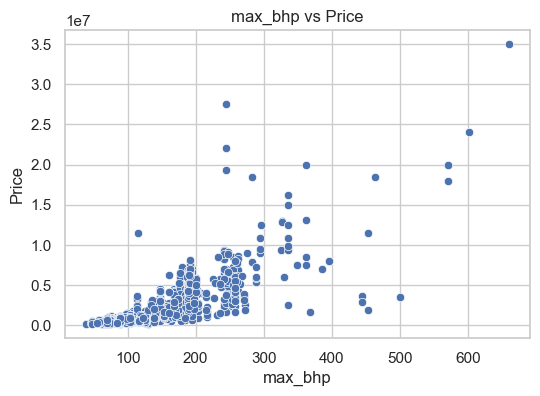

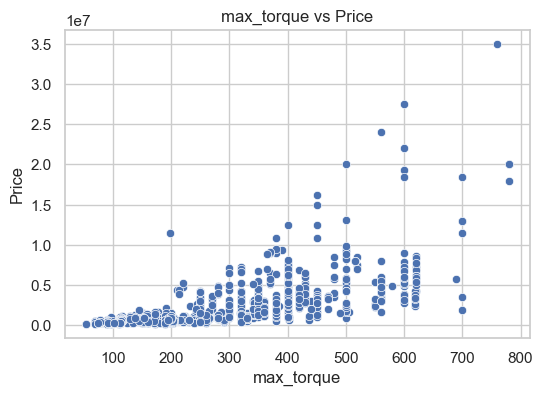

In [12]:
features = ['Engine_Capacity', 'max_bhp', 'max_torque']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='Price')
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')


# Categorical Feature vs Price

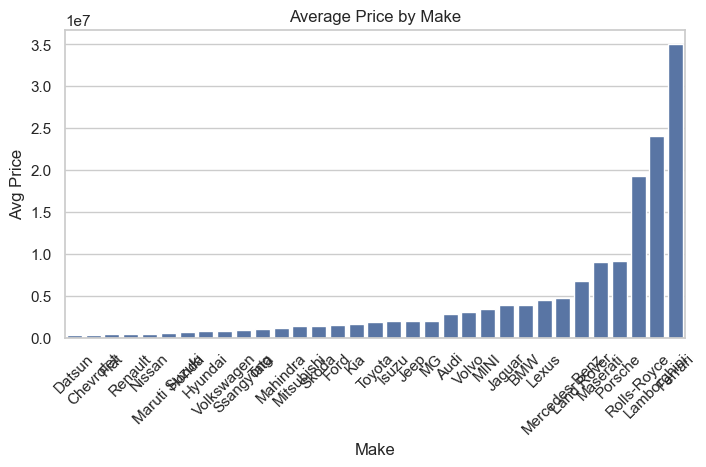

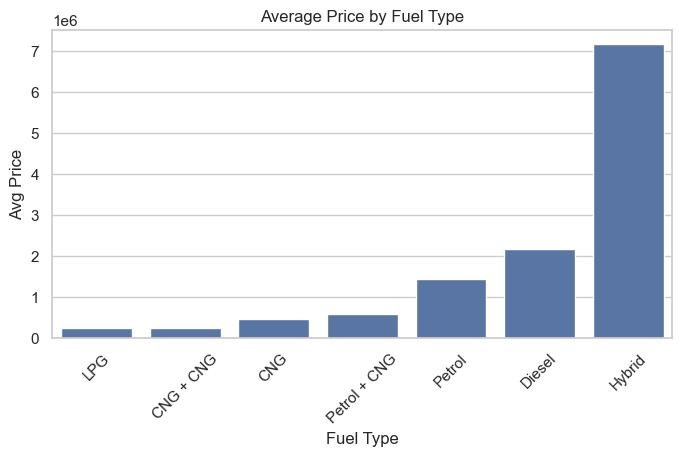

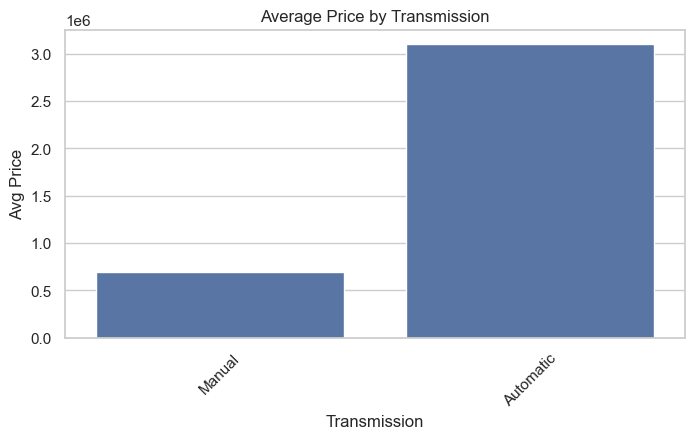

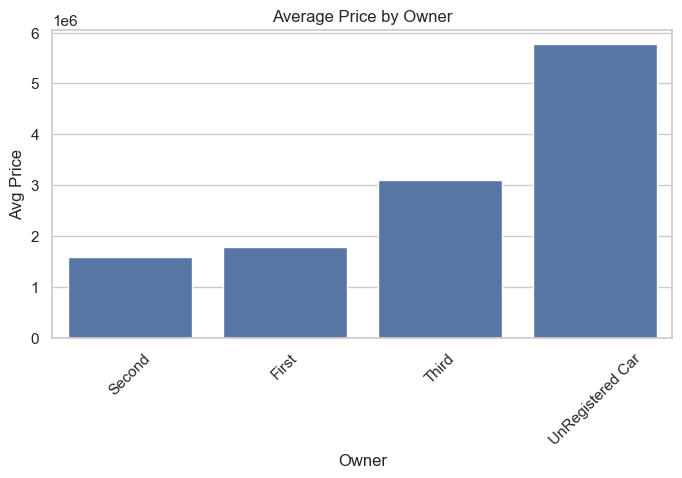

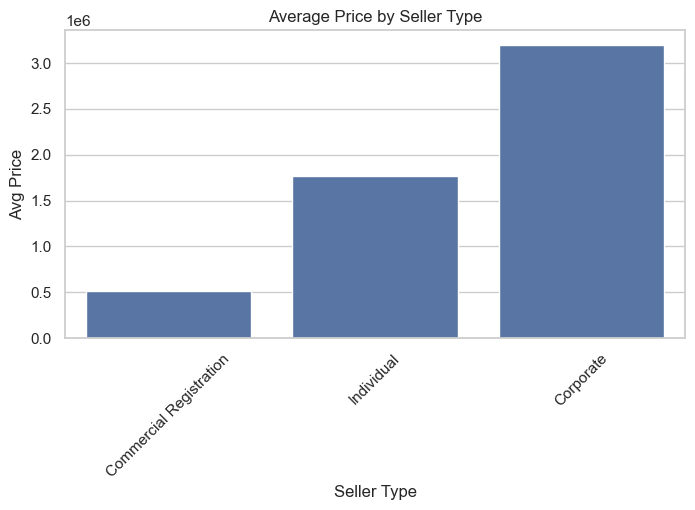

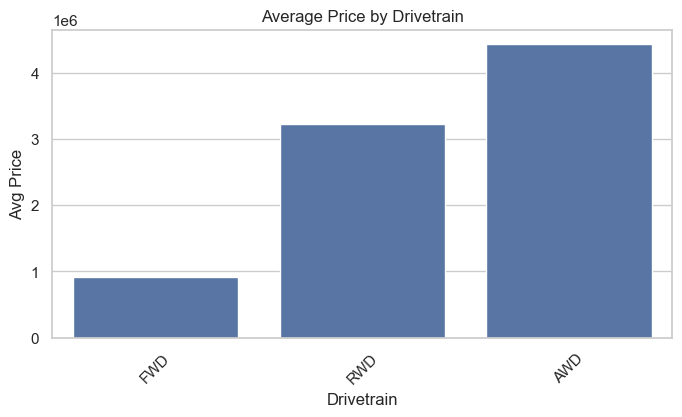

In [21]:
cat_features = ['Make', 'Fuel Type', 'Transmission', 'Owner', 'Seller Type', 'Drivetrain']

for col in cat_features:
    plt.figure(figsize=(8, 4))
    avg_price = df.groupby(col)['Price'].mean().sort_values()
    sns.barplot(x=avg_price.index, y=avg_price.values)
    plt.xticks(rotation=45)
    plt.title(f'Average Price by {col}')
    plt.ylabel("Avg Price")




Text(0.5, 1.0, 'Correlation Heatmap')

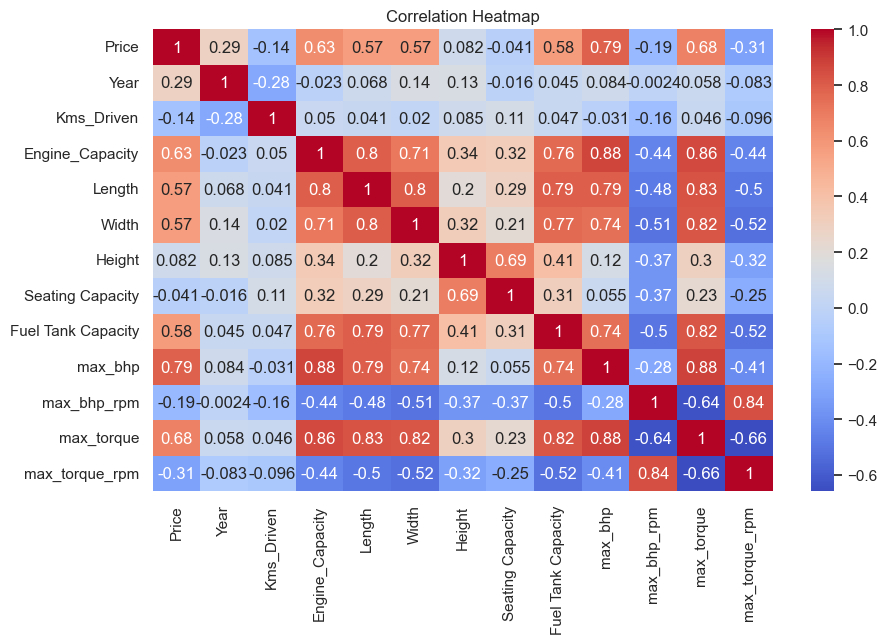

In [18]:
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
